In [11]:
import os
import pandas as pd

# Directory
read_dir = r"C:/Users/namra/Emlyon/30 Master's Thesis/data/dataset_human_cell_atlas/"

# Filenames
expr_filename = 'HCA_genes_cells_filtered_filtered_cell_info.txt'
# metadata_filename = 'filtered_total_sample_ext_organ_celltype_batch.txt'

batch_label = "batchlb"
celltype_label = "CellType"

# Constructing file paths
expr_filepath = os.path.join(read_dir, expr_filename)
# metadata_filepath = os.path.join(read_dir, metadata_filename)

# Reading expression matrix and metadata into dfs
expr_mat = pd.read_csv(expr_filepath, sep='\t', header=0, index_col=0)
# metadata = pd.read_csv(metadata_filepath, sep='\t', header=0, index_col=0)

# Renaming the 'ct' column in metadata to 'CellType'
metadata.rename(columns={'ct': 'CellType'}, inplace=True)

# Filtering the expression matrix to include only columns present in the metadata
expr_mat = expr_mat.loc[:, metadata.index]

# Checking the resulting expression matrix and metadata
display(expr_mat.info())
display(expr_mat.head())
display(metadata.head())


KeyError: "None of [Index(['T-cell_Thymus_1.GCGTCCGGTACACCGCTA',\n       'T-cell_Thymus_2.CGAGTATAGTCGGTCGGT',\n       'T-cell_Thymus_1.TGAAGCTCAAAGCGCTTG',\n       'T-cell_Thymus_1.TTAACTTATTGTGTATAC',\n       'T-cell_Thymus_1.GACACTATTCCACAAAGT',\n       'T-cell_Thymus_1.ATTCCAGGTACATTCATA',\n       'T-cell_Thymus_2.CGGCAGCCGCTAAACCTA',\n       'T-cell_Thymus_1.AGCGAGCGGCAGAAGCGG',\n       'T-cell_Thymus_1.CGTATTCAACAAGTCCCG',\n       'T-cell_Thymus_1.ACACCCCGAGTACGCACC',\n       ...\n       'Epithelial_K16.MAA001867.3_39_F.1.1',\n       'Epithelial_N8.MAA001867.3_39_F.1.1', 'Stromal_N9.MAA001867.3_39_F.1.1',\n       'Stromal_N11.MAA001867.3_39_F.1.1', 'Stromal_O17.MAA001867.3_39_F.1.1',\n       'Stromal_N15.MAA001867.3_39_F.1.1', 'Stromal_M7.MAA001867.3_39_F.1.1',\n       'Stromal_J17.MAA001867.3_39_F.1.1', 'Stromal_M10.MAA001867.3_39_F.1.1',\n       'Stromal_L5.MAA001867.3_39_F.1.1'],\n      dtype='object', length=6954)] are in the [columns]"

Text(0, 0.5, 'Frequency')

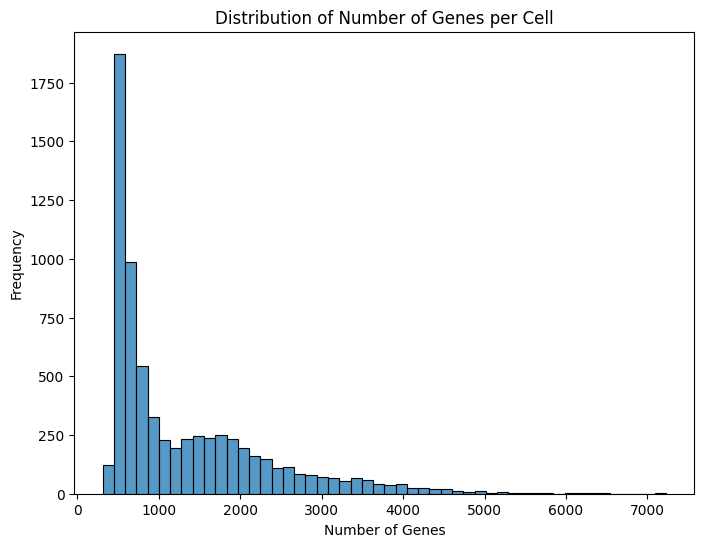

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

metadata = metadata.loc[expr_mat.columns]

# Distribution of Number of Genes per Cell
plt.figure(figsize=(8, 6))
sns.histplot(metadata['nGene'], kde=False, bins=50)
plt.title('Distribution of Number of Genes per Cell')
plt.xlabel('Number of Genes')
plt.ylabel('Frequency')

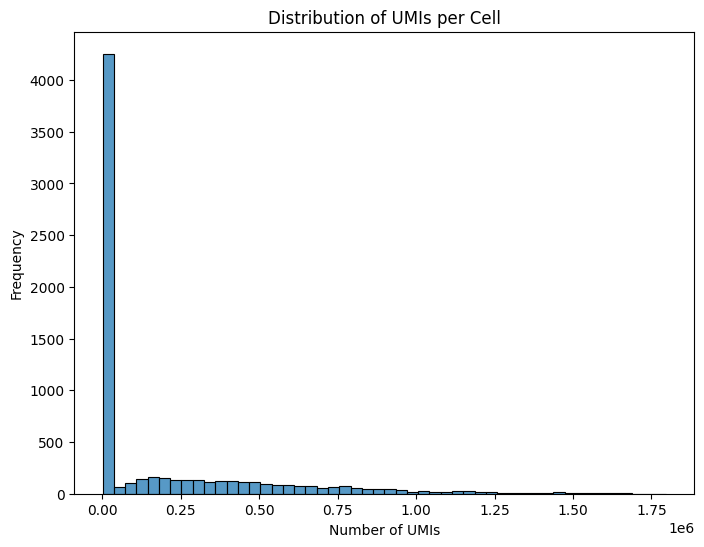

In [4]:
# Distribution of UMIs (nUMI) per Cell
plt.figure(figsize=(8, 6))
sns.histplot(metadata['nUMI'], kde=False, bins=50)
plt.title('Distribution of UMIs per Cell')
plt.xlabel('Number of UMIs')
plt.ylabel('Frequency')
plt.show()

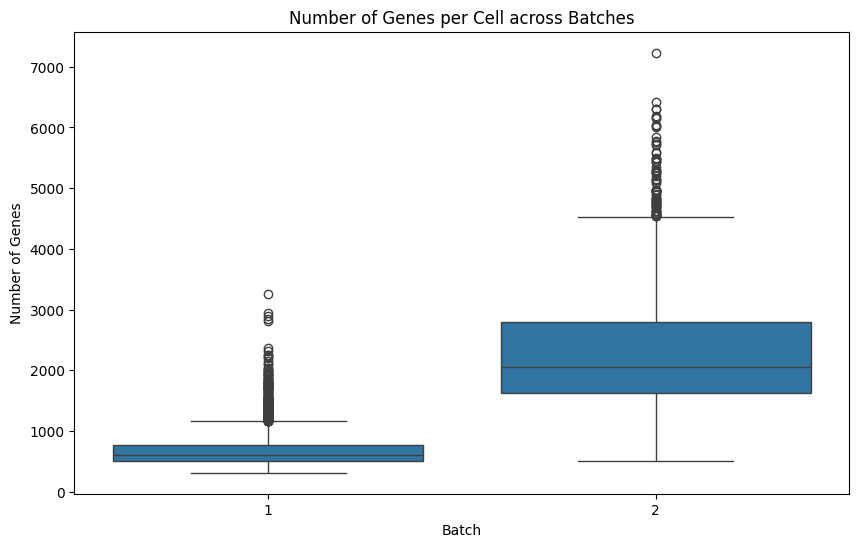

In [4]:
# Compare nGene Distribution Across Batches
plt.figure(figsize=(10, 6))
sns.boxplot(x='batch', y='nGene', data=metadata)
plt.title('Number of Genes per Cell across Batches')
plt.xlabel('Batch')
plt.ylabel('Number of Genes')

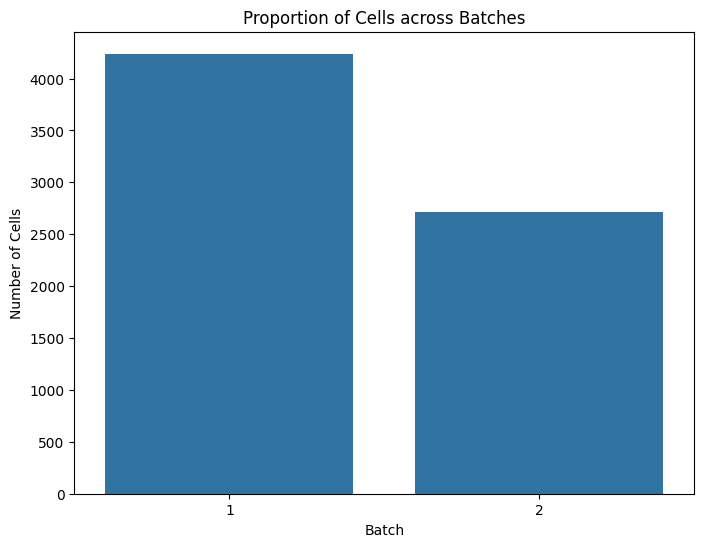

In [5]:
# Proportion of Cells per Batch
plt.figure(figsize=(8, 6))
sns.countplot(x='batch', data=metadata)
plt.title('Proportion of Cells across Batches')
plt.xlabel('Batch')
plt.ylabel('Number of Cells')
plt.show()

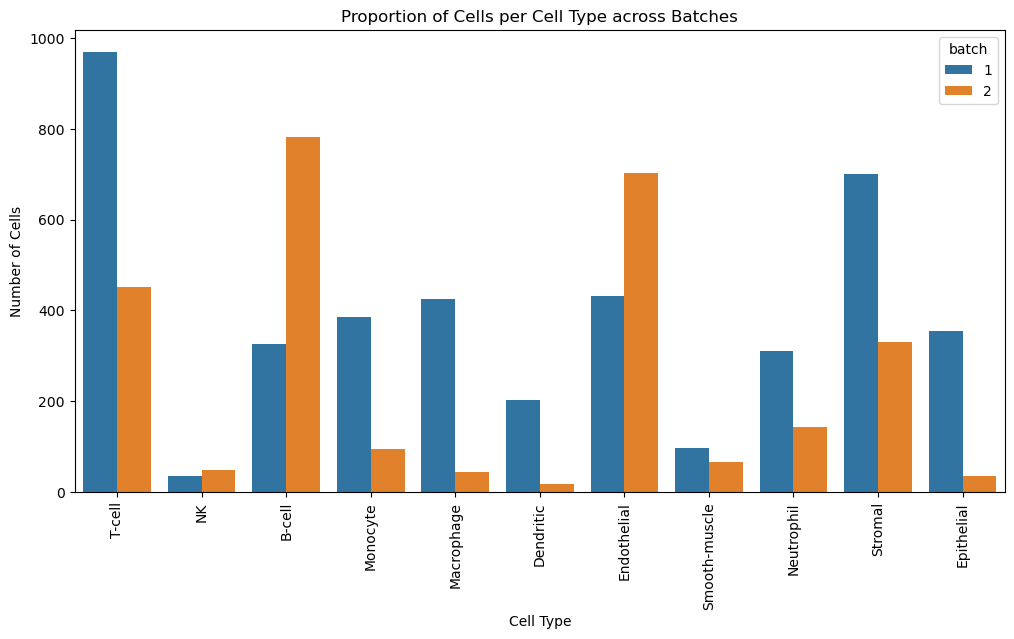

In [9]:
# Proportion of Cells per Cell Type across Batches
plt.figure(figsize=(12, 6))
sns.countplot(x='CellType', hue='batch', data=metadata)
plt.title('Proportion of Cells per Cell Type across Batches')
plt.xticks(rotation=90)
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.show()

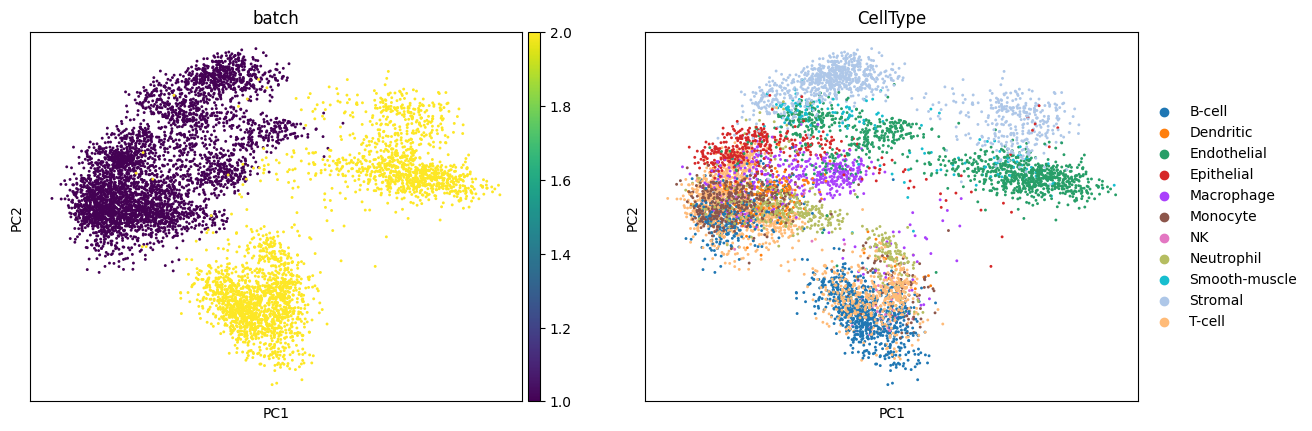

C:\Users\namra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


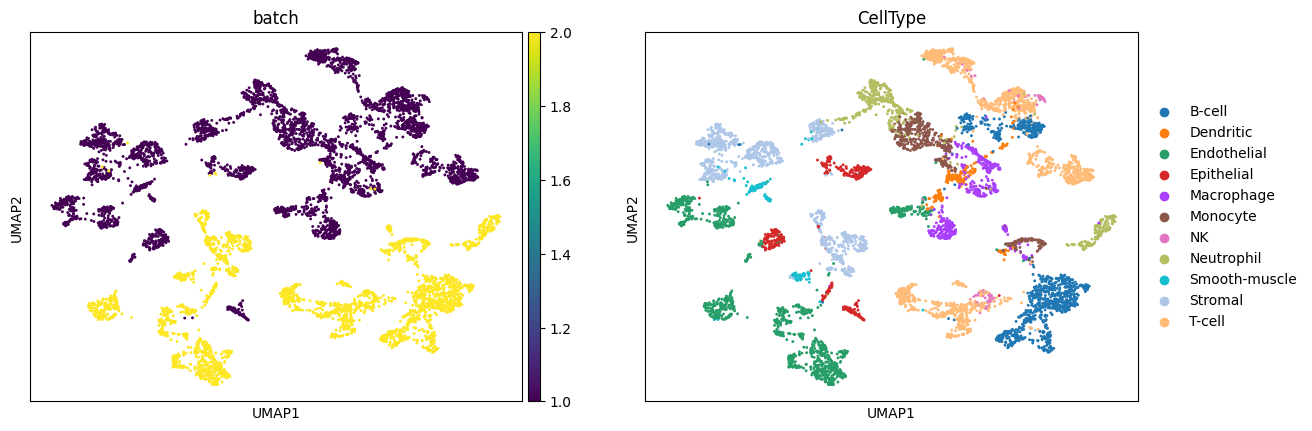

In [6]:
# Prepare data for scanpy AnnData
adata = sc.AnnData(X=expr_mat.T, obs=metadata)

# Normalize & log transform data 
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Run PCA & UMAP for batch visualization
sc.tl.pca(adata)
sc.pl.pca(adata, color=['batch', 'CellType'])

# Running UMAP
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'CellType'])